# Regression Model

In [51]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

import seaborn as sns

%matplotlib inline

In [52]:
df = pd.read_csv("C:/Users/misha/Downloads/MergedData.csv")

df.head()

,Unnamed: 0,OBJECTNUMMER,CBS_Wijkcode,Area code,Area,Rent: average,Average house-value for tax purposes,Area public green (ha),Parking spots total,Mean disposable household income,Most vulnerable (%),Safety index: High Impact Crime,geometry,LNG,LAT,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,0,1.0,BU0363EQ,EQ,Da Costabuurt,823.0,498536.0,0.68,971.0,49800.0,52.0,130.0,"POLYGON ((4.867406 52.371797, 4.869586 52.3686...",4.872108,52.370130,GE05,"Oud-West, De Baarsjes",E,West,257542.0
1,1,2.0,BU0363ER,ER,Westindische Buurt,861.0,443995.0,2.01,1763.0,50500.0,54.0,89.0,"POLYGON ((4.848885 52.358045, 4.848892 52.3579...",4.854062,52.361007,GE05,"Oud-West, De Baarsjes",E,West,345503.0
2,2,3.0,BU0363KB,KB,Schinkelbuurt,774.0,445304.0,1.80,972.0,46200.0,51.0,104.0,"POLYGON ((4.848181 52.342768, 4.849791 52.3429...",4.852877,52.349646,GK11,Oud-Zuid,K,Zuid,344932.0
3,3,4.0,BU0363KC,KC,Willemspark,1349.0,1064407.0,16.38,2624.0,131700.0,55.0,51.0,"POLYGON ((4.855085 52.35641, 4.855027 52.35632...",4.862796,52.354371,GK11,Oud-Zuid,K,Zuid,695818.0
4,4,5.0,BU0363KD,KD,Museumkwartier,1051.0,1011630.0,17.53,4839.0,103000.0,55.0,219.0,"POLYGON ((4.86554 52.358854, 4.867135 52.35610...",4.876464,52.355265,GK11,Oud-Zuid,K,Zuid,1380178.0


In [69]:


df_cleaned = df.dropna()



df_cleaned.rename(columns={'Rent: average': 'Average rent'})




,Unnamed: 0,OBJECTNUMMER,CBS_Wijkcode,Area code,Area,Average rent,Average house-value for tax purposes,Area public green (ha),Parking spots total,Mean disposable household income,Most vulnerable (%),Safety index: High Impact Crime,geometry,LNG,LAT,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,0,1.0,BU0363EQ,EQ,Da Costabuurt,823.0,498536.0,0.68,971.0,49800.0,52.0,130.0,"POLYGON ((4.867406 52.371797, 4.869586 52.3686...",4.872108,52.370130,GE05,"Oud-West, De Baarsjes",E,West,257542.0
1,1,2.0,BU0363ER,ER,Westindische Buurt,861.0,443995.0,2.01,1763.0,50500.0,54.0,89.0,"POLYGON ((4.848885 52.358045, 4.848892 52.3579...",4.854062,52.361007,GE05,"Oud-West, De Baarsjes",E,West,345503.0
2,2,3.0,BU0363KB,KB,Schinkelbuurt,774.0,445304.0,1.80,972.0,46200.0,51.0,104.0,"POLYGON ((4.848181 52.342768, 4.849791 52.3429...",4.852877,52.349646,GK11,Oud-Zuid,K,Zuid,344932.0
3,3,4.0,BU0363KC,KC,Willemspark,1349.0,1064407.0,16.38,2624.0,131700.0,55.0,51.0,"POLYGON ((4.855085 52.35641, 4.855027 52.35632...",4.862796,52.354371,GK11,Oud-Zuid,K,Zuid,695818.0
4,4,5.0,BU0363KD,KD,Museumkwartier,1051.0,1011630.0,17.53,4839.0,103000.0,55.0,219.0,"POLYGON ((4.86554 52.358854, 4.867135 52.35610...",4.876464,52.355265,GK11,Oud-Zuid,K,Zuid,1380178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,106.0,BU0363EK,EK,Van Galenbuurt,711.0,357373.0,3.93,1238.0,37600.0,28.0,118.0,"POLYGON ((4.843038 52.372215, 4.843028 52.3719...",4.849559,52.371973,GE05,"Oud-West, De Baarsjes",E,West,292941.0
106,106,107.0,BU0363EL,EL,Geuzenbuurt,836.0,419762.0,2.08,1466.0,46800.0,52.0,114.0,"POLYGON ((4.855569 52.374358, 4.856556 52.3711...",4.861403,52.372776,GE05,"Oud-West, De Baarsjes",E,West,290653.0
107,107,108.0,BU0363EM,EM,Hoofdweg e.o.,716.0,365986.0,1.13,2094.0,42100.0,44.0,107.0,"POLYGON ((4.848359 52.369716, 4.848708 52.3689...",4.853307,52.367247,GE05,"Oud-West, De Baarsjes",E,West,418118.0
108,108,109.0,BU0363EN,EN,Chassébuurt,814.0,440489.0,0.48,1009.0,45300.0,45.0,72.0,"POLYGON ((4.856556 52.371126, 4.857367 52.3684...",4.860792,52.367594,GE05,"Oud-West, De Baarsjes",E,West,274609.0


Step 1: splitting the data

In [70]:
#splits the data in a training set and test set
train_data, test_data = train_test_split(df_cleaned, test_size=.2, random_state=42)

# Predictor and response array from training set 
x_train = train_data[['Area public green (ha)', 'Parking spots total', 'Mean disposable household income', 'Most vulnerable (%)', 'Safety index: High Impact Crime']].values
y_train = train_data['Rent: average'].values

#Predictor and response array from test set 
x_test = test_data[['Area public green (ha)', 'Parking spots total', 'Mean disposable household income', 'Most vulnerable (%)', 'Safety index: High Impact Crime']].values
y_test = test_data['Rent: average'].values





Step 2: retrieving $\beta$ coefficients and results table by using Statsmodel

In [71]:
#includes a column of ones
x_train_sm = sm.add_constant(x_train)

#to build the OLS model
model_sm = sm.OLS(y_train, x_train)

# to fit the data to the model and store the information in results_sm
results_sm = model_sm.fit()

#to access other/more information in the results_sm
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1110.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                    2.37e-48
Time:                        14:05:02   Log-Likelihood:                         -305.87
No. Observations:                  53   AIC:                                      621.7
Df Residuals:                      48   BIC:                                      631.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Step 3: Plotting the regression  

In [ ]:


# creating a function to plot regression model for each x variable
def plot_regression(cur_model, poly_transformer=None):
    
    # build the x values for the prediction line
    x_vals = np.arange(0,24,.1).reshape(-1,1)
    
    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = cur_model.predict(dm)
    
    # plot the prediction line, and the test data
    plt.plot(x_vals,prediction, color='k', label="Prediction")
    plt.scatter(X_test, y_test, label="Test Data")

    # label your plots
    plt.ylabel("Number of Taxi Pickups")
    plt.xlabel("Time of Day (Hours Past Midnight)")
    plt.legend()
    plt.show()






In [72]:
x_train_income = train_data[['Mean disposable household income']].values.reshape(-1, 1)
x_train_parking = train_data[['Parking spots total']].values.reshape(-1, 1)
x_train_green = train_data[['Area public green (ha)']].values.reshape(-1, 1)
x_train_vulnerable = train_data[['Most vulnerable (%)']].values.reshape(-1, 1)
x_train_safety = train_data[['Safety index: High Impact Crime']].values.reshape(-1, 1)
y_train_reshaped = train_data['Rent: average'].values.reshape(-1, 1)

x_test_income = test_data[['Mean disposable household income']].values.reshape(-1, 1)
x_test_parking = test_data[['Parking spots total']].values.reshape(-1, 1)
x_test_green = test_data[['Area public green (ha)']].values.reshape(-1, 1)
x_test_vulnerable = test_data[['Most vulnerable (%)']].values.reshape(-1, 1)
x_test_safety = test_data[['Safety index: High Impact Crime']].values.reshape(-1, 1)
y_test_reshaped = test_data['Rent: average'].values.reshape(-1, 1)

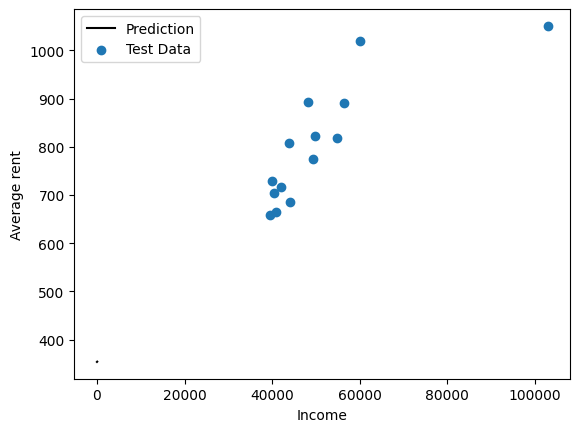

In [78]:
from sklearn.linear_model import LinearRegression

# creating a function to plot regression model for each x variable
def plot_regression(x_train_income, poly_transformer=None):
    
    # build the x values for the prediction line
    x_vals = np.arange(0,60,1).reshape(-1,1)
    
    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = fitted_model_income.predict(dm)
    
    # plot the prediction line, and the test data
    plt.plot(x_vals,prediction, color='k', label="Prediction")
    plt.scatter(x_test_income, y_test_reshaped, label="Test Data")

    # label your plots
    plt.ylabel("Average rent")
    plt.xlabel("Income")
    plt.legend()
    plt.show()

fitted_model_income = LinearRegression().fit(x_train_income, y_train_reshaped)
plot_regression(fitted_model_income)

In [ ]:
x_train_income = train_data[['Mean disposable household income']].values.reshape(-1, 1)
x_train_parking = train_data[['Parking spots total']].values.reshape(-1, 1)
x_train_green = train_data[['Area public green (ha)']].values.reshape(-1, 1)
x_train_vulnerable = train_data[['Most vulnerable (%)']].values.reshape(-1, 1)
x_train_safety = train_data[['Safety index: High Impact Crime']].values.reshape(-1, 1)
y_train_reshaped = train_data['Rent: average'].values.reshape(-1, 1)

x_test_income = test_data[['Mean disposable household income']].values.reshape(-1, 1)
x_test_parking = test_data[['Parking spots total']].values.reshape(-1, 1)
x_test_green = test_data[['Area public green (ha)']].values.reshape(-1, 1)
x_test_vulnerable = test_data[['Most vulnerable (%)']].values.reshape(-1, 1)
x_test_safety = test_data[['Safety index: High Impact Crime']].values.reshape(-1, 1)
y_test_reshaped = test_data['Rent: average'].values.reshape(-1, 1)


fitted_model_income = LinearRegression().fit(x_train_income, y_train_reshaped)
plot_regression(fitted_model_income)

fitted_model_parking = LinearRegression().fit(x_train_parking, y_train_reshaped)
plot_regression(fitted_model_parking)

fitted_model_green = LinearRegression().fit(x_train_green, y_train_reshaped)
plot_regression(fitted_model_green)

fitted_model_vulnerable = LinearRegression().fit(x_train_vulnerable, y_train_reshaped)
plot_regression(fitted_model_vulnerable)

fitted_model_safety = LinearRegression().fit(x_train_safety, y_train_reshaped)
plot_regression(fitted_model_safety)



fitted_model_income = LinearRegression().fit(x_train_income, y_train_reshaped)
plot_regression(fitted_model_income, x_train_income, y_train_reshaped, "Rent vs. Mean Disposable Household Income", "Mean Disposable Household Income")

fitted_model_parking = LinearRegression().fit(x_train_parking, y_train_reshaped)
plot_regression(fitted_model_parking, x_train_parking, y_train_reshaped, "Rent vs. Parking Spots Total", "Parking Spots Total")

fitted_model_green = LinearRegression().fit(x_train_green, y_train_reshaped)
plot_regression(fitted_model_green, x_train_green, y_train_reshaped, "Rent vs. Area Public Green (ha)", "Area Public Green (ha)")

fitted_model_vulnerable = LinearRegression().fit(x_train_vulnerable, y_train_reshaped)
plot_regression(fitted_model_vulnerable, x_train_vulnerable, y_train_reshaped, "Rent vs. Most Vulnerable (%)", "Most Vulnerable (%)")

fitted_model_safety = LinearRegression().fit(x_train_safety, y_train_reshaped)
plot_regression(fitted_model_safety, x_train_safety, y_train_reshaped, "Rent vs. Safety Index: High Impact Crime", "Safety Index: High Impact Crime")